# Testing the corr2 function
The corr1 function has been designed to match sigmomEdw at the data points for the fit results using sigmomEdw.  The corr2 function is the corr1 function plus a multilinear term whose coefficients are determined by a fit on the difference between corr1 and sigmomEdw over the MCMC paramter space.

This notebook checks this.

What the plots at the bottom of the notebook show is that the corr1 function actually matches sigmomEdw better at the sigmomEdw fit values.  The corr2 function is based on a multilinear fit of the difference between corr1 and sigmomEdw.  Therefore it is expected to match sigmomEdw better over the parameter space but doesn't match as well at the nominal values.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import sys
sys.path.append('../python/')
from EdwRes import *
from prob_dist import *

GGA3/NR/4.0/5.556E-02/0.0380/000/0.1493/0.1782/0.9975/
GGA3/NR/4.0/5.556E-02/0.0381/000/0.1537/0.1703/0.9948/


In [2]:
# We'll look at the Er values of the data points
# import data from Edelweiss
resNR_data = pd.read_csv("data/edelweiss_NRwidth_GGA3_data.txt", skiprows=1, \
                       names=['E_recoil', 'sig_NR', 'E_recoil_err', 'sig_NR_err'], \
                       delim_whitespace=True)

# the sorting is necessary!
# otherwise the mask defined below will select the wrong data
resNR_data = resNR_data.sort_values(by='E_recoil')
NR_data = {'Erecoil': resNR_data["E_recoil"][2::], 'sigma': resNR_data["sig_NR"][2::], 'sigma_err': resNR_data["sig_NR_err"][2::]}
Er = np.sort(NR_data['Erecoil'])
Erecoil = Er[0]
#print (NR_data['Erecoil'])
#print (NR_data['sigma'])
#print (NR_data['sigma_err'])
#print (len(samples))
#print(np.random.randint(len(samples), size=10))

In [4]:
# Set the best fit parameters, from Repositories/nrFano_paper2019_master.git/analysis_notebooks/fit_results_sigmom_corrAB.txt
# values in the text file are the result of the fit in Repositories/nrFano_paper2019_master.git/analysis_notebooks/edelweiss_fit_allParameters_sigmom_ABCorr.ipynb
aH_fit, C_fit, m_fit, scale_fit, A_fit, B_fit = np.array([3.81134613e-02, 3.32613445e-02, 1.11522962e-04, 9.94778557e-01, 1.53737587e-01, 1.70327657e-01])

# plot the best fit
# GGA3 parameters from Edelweiss tables
# all the parameters affect the points as expected
V_fit = abs(scale_fit)*4.0

In [ ]:
# evaulate the NR variance using sigmomEdw (the fully-correct form of the variance)
model_NR_0 = [sigmomEdw(x, band='NR',label='GGA3',F=0.000001, V=V_fit, aH=aH_fit, alpha=1/18.0, A=A_fit, B=B_fit) for x in NR_data['Erecoil']] 
model_NR = np.sqrt(np.power(C_fit + m_fit*NR_data['Erecoil'], 2) + np.power(model_NR_0,2))

In [5]:
## get the NR prediction for the input parameters using the corr2 function
# series_NRQ_var_corr2(Er=10.0,F=0.0,V=4.0,aH=0.0381,alpha=(1/18.0),A=0.16,B=0.18,label='GGA3',corr1file='data/sigdiff_test.h5')
# series_NRQ_var_corr2 returns the *variance*
model_NR_0_corr2 = [series_NRQ_var_corr2(x, 0, V_fit, aH_fit, 1/18.0, A_fit, B_fit, 'GGA3') for x in NR_data['Erecoil']] 
model_NR_corr2 = np.sqrt(np.power(C_fit + m_fit*NR_data['Erecoil'], 2) + model_NR_0_corr2)

In [26]:
## get the NR prediction for the input parameters using the corr1 function
# series_NRQ_var_corr1(Er=10.0,F=0.0,V=4.0,aH=0.0381,alpha=(1/18.0),A=0.16,B=0.18,label='GGA3',corr1file='data/sigdiff_test.h5')
# series_NRQ_var_corr1 returns the *variance*
model_NR_0_corr1 = [series_NRQ_var_corr1(x, 0, V_fit, aH_fit, 1/18.0, A_fit, B_fit, 'GGA3') for x in NR_data['Erecoil']] 
model_NR_corr1 = np.sqrt(np.power(C_fit + m_fit*NR_data['Erecoil'], 2) + model_NR_0_corr1)

(0.035, 0.08)

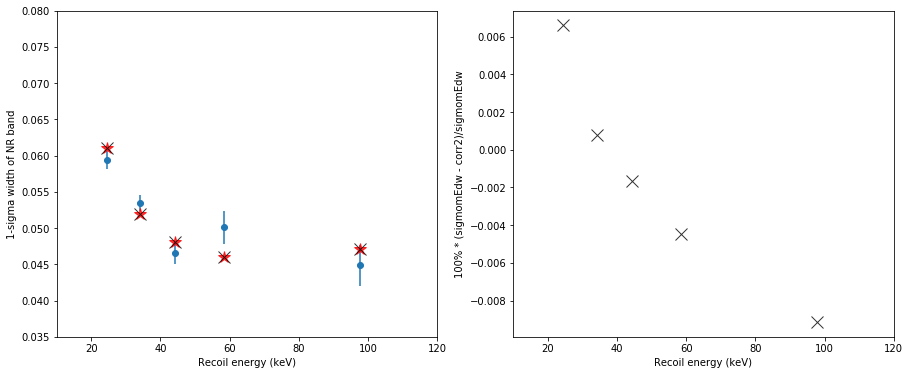

In [30]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
# the ER-band fit
ax1 = axs[0]
ax2 = axs[1]

#ax1.plot(ER_data['Erecoil'], model_ER, 'r*', alpha=0.8, markersize=12)
ax1.plot(NR_data['Erecoil'], model_NR, 'r*', alpha=0.8, markersize=12)
ax1.plot(NR_data['Erecoil'], model_NR_corr2, 'kx', alpha=0.8, markersize=12)

# plot the data
#ax1.errorbar(ER_data['Erecoil'], ER_data['sigma'], yerr=ER_data['sigma_err'], fmt="o", label="data")
ax1.errorbar(NR_data['Erecoil'], NR_data['sigma'], yerr=NR_data['sigma_err'], fmt="o", label="data")

#ax1.plot(E_recoil_arr, sig_er_func(E_recoil_arr), label="Edelweiss ER resolution, C=0.0313")
#ax1.set(xlabel="Recoil energy (keV)", ylabel="1-sigma width of ER band")
ax1.set(xlabel="Recoil energy (keV)", ylabel="1-sigma width of NR band")

## plot the difference between sigmomEdw and corr2 
ax2.plot(NR_data['Erecoil'], 100*(model_NR - model_NR_corr2)/model_NR, 'kx', alpha=0.8, markersize=12)
ax2.set(xlabel="Recoil energy (keV)", ylabel="100% * (sigmomEdw - corr2)/sigmomEdw")
    
ax1.set_xlim(10, 120)
ax2.set_xlim(10, 120)
ax1.set_ylim(0.035, 0.08)
#ax2.set_ylim(0.035, 0.1)

(0.035, 0.08)

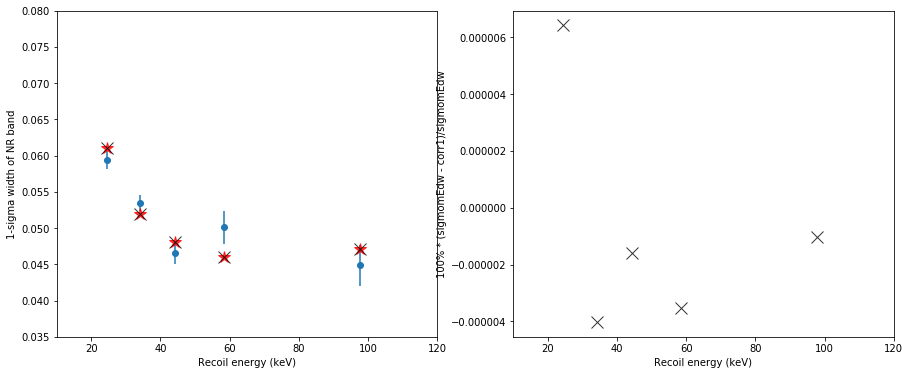

In [29]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
# the ER-band fit
ax1 = axs[0]
ax2 = axs[1]

#ax1.plot(ER_data['Erecoil'], model_ER, 'r*', alpha=0.8, markersize=12)
ax1.plot(NR_data['Erecoil'], model_NR, 'r*', alpha=0.8, markersize=12)
ax1.plot(NR_data['Erecoil'], model_NR_corr1, 'kx', alpha=0.8, markersize=12)

# plot the data
#ax1.errorbar(ER_data['Erecoil'], ER_data['sigma'], yerr=ER_data['sigma_err'], fmt="o", label="data")
ax1.errorbar(NR_data['Erecoil'], NR_data['sigma'], yerr=NR_data['sigma_err'], fmt="o", label="data")

#ax1.plot(E_recoil_arr, sig_er_func(E_recoil_arr), label="Edelweiss ER resolution, C=0.0313")
#ax1.set(xlabel="Recoil energy (keV)", ylabel="1-sigma width of ER band")
ax1.set(xlabel="Recoil energy (keV)", ylabel="1-sigma width of NR band")

## plot the difference between sigmomEdw and corr2 
ax2.plot(NR_data['Erecoil'], 100*(model_NR - model_NR_corr1)/model_NR, 'kx', alpha=0.8, markersize=12)
ax2.set(xlabel="Recoil energy (keV)", ylabel="100% * (sigmomEdw - corr1)/sigmomEdw")
    
ax1.set_xlim(10, 120)
ax2.set_xlim(10, 120)
ax1.set_ylim(0.035, 0.08)
#ax2.set_ylim(0.035, 0.1)